In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
comments = pd.read_csv('UScomments.csv', on_bad_lines='skip')
comments

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5796\250600113.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv('UScomments.csv', on_bad_lines='skip')


video_id                                       comment_text likes  \
0       XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1       XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2       XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3       XpVt6Z1Gjjo                                MY FAN . attendance     3   
4       XpVt6Z1Gjjo                                         trending 😉     3   
...             ...                                                ...   ...   
691395  EoejGgUNmVU                                             Лучшая     1   
691396  EoejGgUNmVU  qu'est ce que j'aimerais que tu viennes à Roan...     0   
691397  EoejGgUNmVU                          Ven a mexico! 😍 te amo LP     0   
691398  EoejGgUNmVU                                    Islığı yeter...     0   
691399  EoejGgUNmVU  Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...     0   

       replies  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
691395       0  
691396       0  
691397       0  
691398       0  
691399       0  

[691400 rows x 4 columns]

In [3]:
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

### Clearly there are 26 Null values in comment_text column And tehse are very less values. So we can drop it easily

In [4]:
comments.dropna(inplace=True)

In [5]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [6]:
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

# **$$Sentiment-Analysis$$**

In [7]:
from textblob import TextBlob

In [8]:
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [9]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️	").sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [10]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️	").sentiment.polarity

0.0

### Now we want to do this to the whole column

In [11]:
comments.shape

(691374, 4)

In [12]:
polarity=[]
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [13]:
len(polarity)

691374

In [14]:
comments['polarity']=polarity

In [15]:
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

# **$$WordColud -Analysis$$**

In [16]:
filter1=comments['polarity']==1
comments_positive=comments[filter1]
comments_positive.head()

video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227  WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307  sjlHnJvXdQs                                  This is priceless     0   
319  sjlHnJvXdQs                                Summed up perfectly     0   

    replies  polarity  
64        0       1.0  
156       0       1.0  
227       0       1.0  
307       0       1.0  
319       0       1.0

In [17]:
filter1=comments['polarity']==-1
comments_negative=comments[filter1]
comments_negative.head()

video_id                                       comment_text likes  \
512   8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562   8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952   Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371  vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391  vu_9muoxT50                    cheeseus christ thats insane!!!     0   

     replies  polarity  
512        0      -1.0  
562        0      -1.0  
952        0      -1.0  
1371       0      -1.0  
1391       0      -1.0

In [18]:
from wordcloud import WordCloud, STOPWORDS

In [19]:
#set(STOPWORDS)

### These are the stp words which i dont need my Wordcloud analysis

In [20]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [21]:
type(comments['comment_text'])

pandas.core.series.Series

### The above comment column is Series format. To use wordcloud we need to convert this into list format.

In [22]:
total_positive_comments=''.join(comments_positive['comment_text'])

In [23]:
Wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_positive_comments)

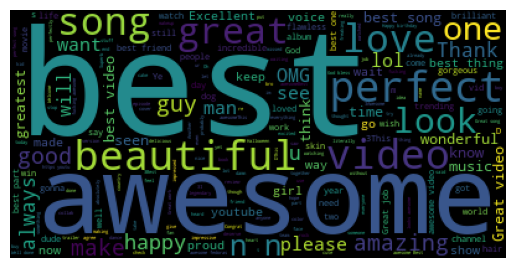

In [24]:
plt.imshow(Wordcloud)
plt.axis('off');

## Negative Polarity

In [25]:
total_negative_comments=''.join(comments_negative['comment_text'])

In [26]:
Wordcloud2=WordCloud(stopwords=set(STOPWORDS)).generate(total_negative_comments)

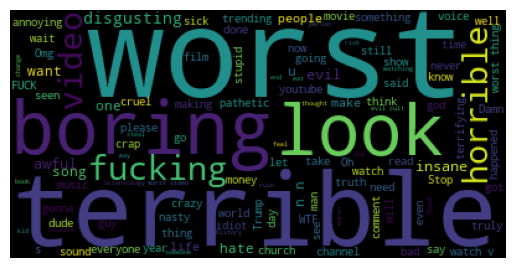

In [27]:
plt.imshow(Wordcloud2)
plt.axis('off');

# **$$Emoji-Analysis$$**

In [36]:
!pip install emoji==2.2.0

In [38]:
import emoji
print(emoji.__version__)

2.2.0


In [32]:
comments['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

### We will try to extract emoji from the text in column_text column

In [39]:
all_emoji_lst=[]
for comment in comments['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emoji_lst.append(char)

In [48]:
print(all_emoji_lst[0:10])
len(all_emoji_lst)

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']


294549

##### Counter is a dictionary subclass designed for counting hashable objects. It automatically creates a frequency count of elements in an iterable.

In [45]:
from collections import Counter
Counter(all_emoji_lst).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [51]:
emojis=[Counter(all_emoji_lst).most_common(10)[i][0] for i in range(10)]
freq=[Counter(all_emoji_lst).most_common(10)[i][1] for i in range(10)]

C:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128150 (\N{SPARKLING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


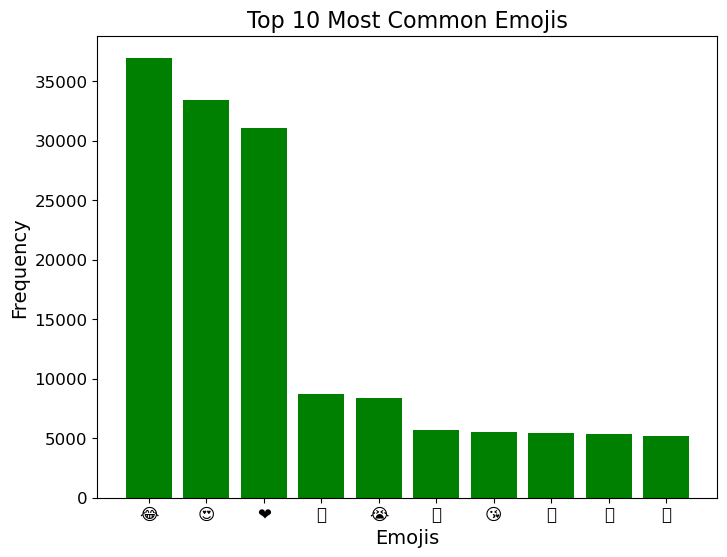

In [54]:
plt.figure(figsize=(8, 6))  
plt.bar(emojis, freq, color='green')
plt.title('Top 10 Most Common Emojis', fontsize=16) 
plt.xlabel('Emojis', fontsize=14) 
plt.ylabel('Frequency', fontsize=14) 
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.show();

### **Bar graph using plotly library (Data Visualization Library)**

In [56]:
import plotly.graph_objs as go
from plotly.offline import iplot

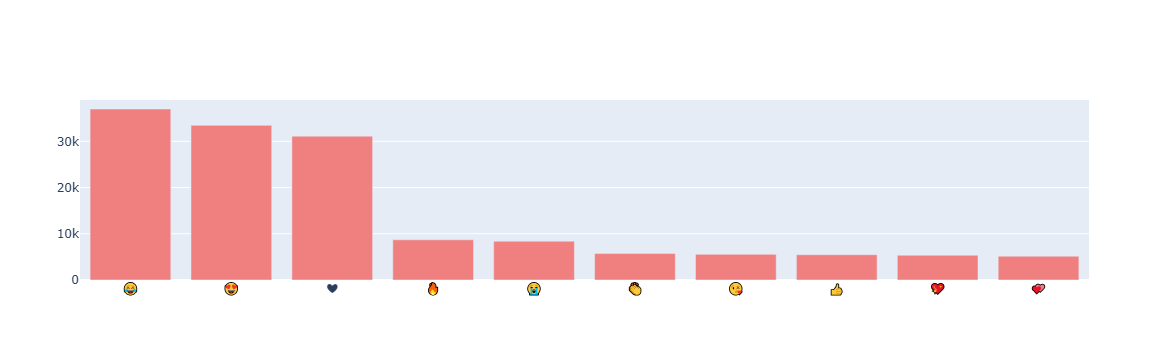

In [60]:
trace=go.Bar(x=emojis,y=freq,marker=dict(color='lightcoral'))
iplot([trace])

---

# **Collect Entire Data Of Youtube of different countries from a folder**

In [5]:
## We  will create/modify/access content a file at some particular location in OS(operating system)

In [6]:
import os

In [7]:
files=os.listdir(r'C:\Users\lenovo\OneDrive\Documents\additional_data')

In [8]:
files_csv=[file for file in files if '.csv' in file]
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'merged_data.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [9]:
# I want to store the above all the data in new dataframe 

In [10]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [11]:
## since we have data fro various countries, encodding matters a lot ( collection of data wrt various countries)
full_df=pd.DataFrame()
path= r'C:\Users\lenovo\OneDrive\Documents\additional_data'

for file in files_csv:
    current_df=pd.read_csv(path+'/'+file, encoding='iso-8859-1',on_bad_lines='skip')
    full_df=pd.concat([full_df,current_df],ignore_index=True)

In [12]:
# The full_df contains all the information of the above csv file
full_df.shape

(385942, 16)

### Delete Duplicate entries and export data into (csv,json and db)

In [13]:
full_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
385937     True
385938    False
385939    False
385940    False
385941    False
Length: 385942, dtype: bool

In [14]:
full_df[full_df.duplicated()].shape

(40064, 16)

In [15]:
full_df1=full_df.drop_duplicates()

* **full_df1 doesn't contains and duplicates rows**

In [16]:
full_df1.shape

(345878, 16)

In [17]:
## Now we will export data  
full_df1[0:10000].to_csv(r'C:\Users\lenovo\OneDrive\Documents\additional_data\merged_data.csv', index=False)

* **A csv file with name "merged_data" has been created in additional_data file**

In [18]:
full_df1[0:1000].to_json(r'C:\Users\lenovo\OneDrive\Documents\additional_data\merged_data.json')

* **A Json File with name "merged_data" has been created in additional_data file**

* Now we want to store this data into some database. For that w ehave create an engine(using engine i can connect with my database)

In [19]:
from sqlalchemy import create_engine

In [20]:
engine=create_engine(r'sqlite:///C:\Users\lenovo\OneDrive\Documents\additional_data/youtube_sample.sqlite')

In [21]:
full_df1[0:1000].to_sql('users',con=engine,if_exists='append') 

1000

In [22]:
# A table has been created with name 'users'. co is for connection

* A sql lite file has been created in additional_data file.

In [23]:
full_df1.head(3)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   

                                         description  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...  
1  STill got a lot of packages. Probably will las...  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...

In [24]:
full_df1['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [25]:
# Read json file
json_df=pd.read_json(r'C:\Users\lenovo\OneDrive\Documents\additional_data/US_category_id.json')
json_df.head(5)

kind  \
0  youtube#videoCategoryListResponse   
1  youtube#videoCategoryListResponse   
2  youtube#videoCategoryListResponse   
3  youtube#videoCategoryListResponse   
4  youtube#videoCategoryListResponse   

                                                etag  \
0  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
1  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
2  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
3  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
4  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   

                                               items  
0  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
1  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
2  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
3  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
4  {'kind': 'youtube#videoCategory', 'etag': '"m2...

In [26]:
# In json dataframe every entries of item column is dectionary itself
json_df['items']

0     {'kind': 'youtube#videoCategory', 'etag': '"m2...
1     {'kind': 'youtube#videoCategory', 'etag': '"m2...
2     {'kind': 'youtube#videoCategory', 'etag': '"m2...
3     {'kind': 'youtube#videoCategory', 'etag': '"m2...
4     {'kind': 'youtube#videoCategory', 'etag': '"m2...
5     {'kind': 'youtube#videoCategory', 'etag': '"m2...
6     {'kind': 'youtube#videoCategory', 'etag': '"m2...
7     {'kind': 'youtube#videoCategory', 'etag': '"m2...
8     {'kind': 'youtube#videoCategory', 'etag': '"m2...
9     {'kind': 'youtube#videoCategory', 'etag': '"m2...
10    {'kind': 'youtube#videoCategory', 'etag': '"m2...
11    {'kind': 'youtube#videoCategory', 'etag': '"m2...
12    {'kind': 'youtube#videoCategory', 'etag': '"m2...
13    {'kind': 'youtube#videoCategory', 'etag': '"m2...
14    {'kind': 'youtube#videoCategory', 'etag': '"m2...
15    {'kind': 'youtube#videoCategory', 'etag': '"m2...
16    {'kind': 'youtube#videoCategory', 'etag': '"m2...
17    {'kind': 'youtube#videoCategory', 'etag': 

* Each of the row itself is a dictionary

In [27]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

* Again we have dictionary in snippet

In [28]:
json_df['items'][3]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
 'id': '15',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Pets & Animals',
  'assignable': True}}

In [29]:
cat_dict={}
for item in json_df['items'].values:
    cat_dict[int(item['id'])]=item['snippet']['title']

In [30]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [31]:
full_df1['category_name']=full_df1['category_id'].map(cat_dict)

In [32]:
full_df1.head(3)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   

                                         description category_name  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...         Music  
1  STill got a lot of packages. Probably will las...        Comedy  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...        Comedy

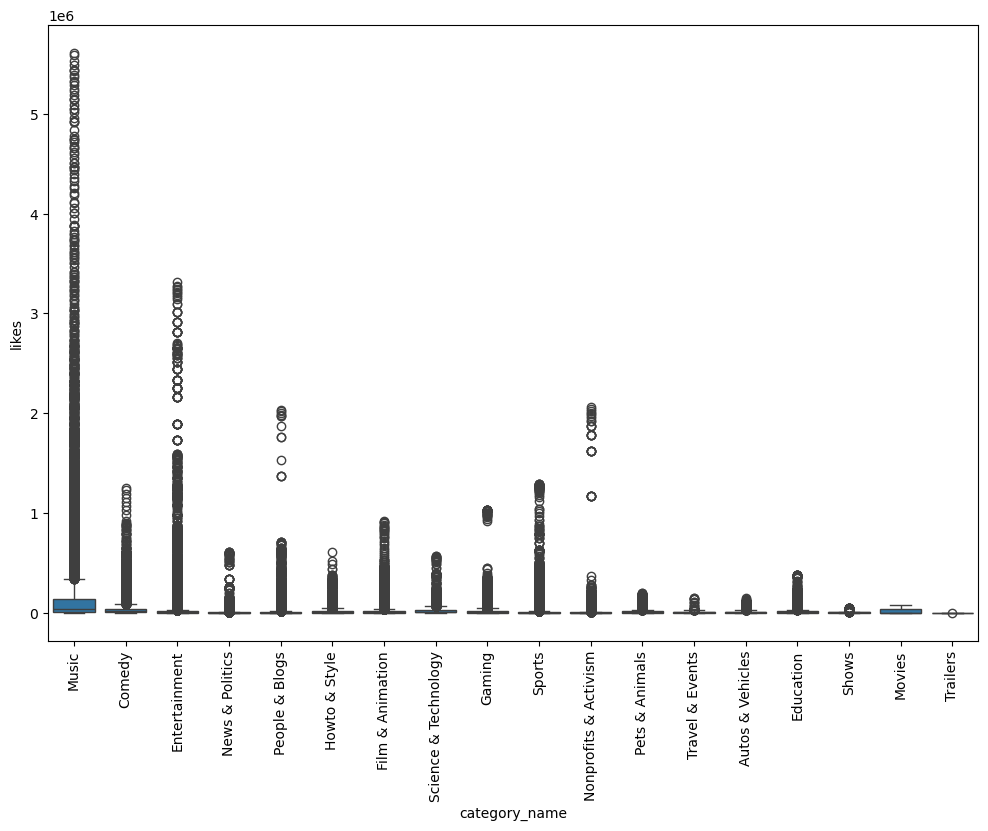

In [33]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='likes',data=full_df1)
plt.xticks(rotation='vertical');

# **Audience are engagged or not?**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
full_df1['like_rate']=(full_df1['likes']/full_df1['views'])*100
full_df1['dislike_rate']=(full_df1['dislikes']/full_df1['views'])*100
full_df1['comment_count_rate']=(full_df1['comment_count']/full_df1['views'])*100

In [39]:
full_df1.head(3)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   

                                         description category_name  like_rate  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...         Music   4.589104   
1  STill got a lot of packages. Probably will las...        Comedy  12.594873   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...        Comedy   4.575843   

   dislike_rate  comment_count_rate  
0      0.253051            0.733639  
1      0.166363            1.284185  
2      0.167292            0.256342

In [41]:
full_df1.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

* Now we will plot Boxplot

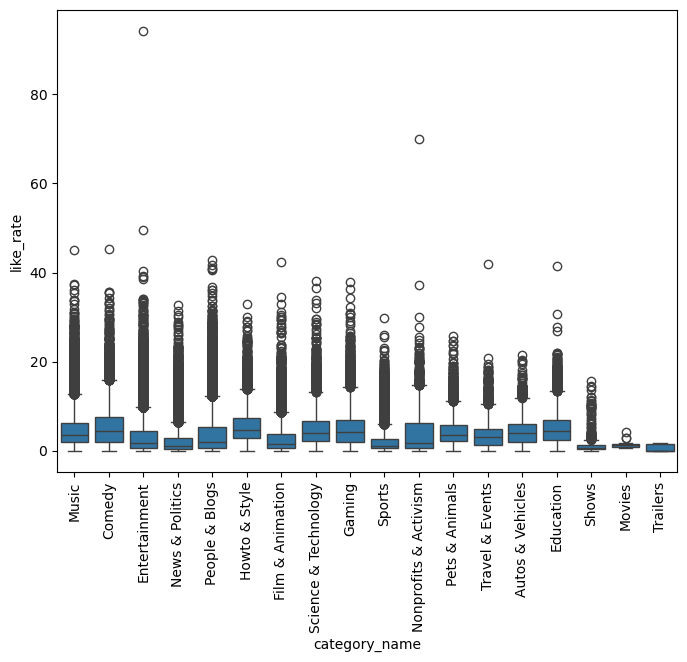

In [44]:
plt.figure(figsize=(8,6))
sns.boxplot(x='category_name',y='like_rate',data=full_df1)
plt.xticks(rotation='vertical');

* Realtionship Between Viwes and Likes(Regression Plot)

<Axes: xlabel='views', ylabel='likes'>

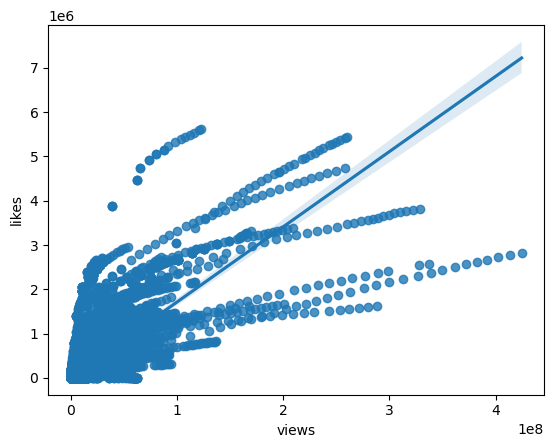

In [45]:
sns.regplot(x='views',y='likes',data=full_df1)

#### Here we can see that as the number of views increases likes alos increases.

In [48]:
full_df1[['views','likes','dislikes']]

views    likes  dislikes
0       17158579   787425     43420
1        1014651   127794      1688
2        3191434   146035      5339
3        2095828   132239      1989
4       33523622  1634130     21082
...          ...      ...       ...
385936   8259128   645888      4052
385938   1064798    60008       382
385939   1066451    48068      1032
385940   5660813   192957      2846
385941  10306119   357079    212976

[345878 rows x 3 columns]

In [50]:
full_df1[['views','likes','dislikes']].corr()

views     likes  dislikes
views     1.000000  0.779985  0.407291
likes     0.779985  1.000000  0.453287
dislikes  0.407291  0.453287  1.000000

### Heat Map

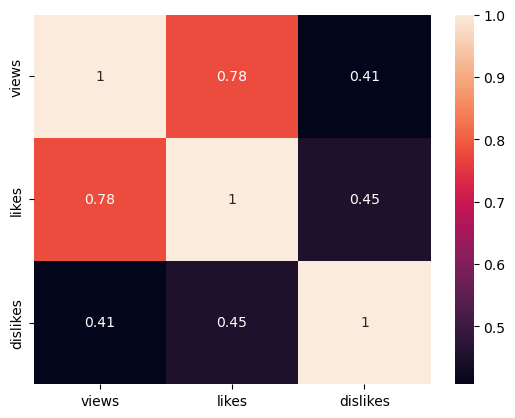

In [54]:
sns.heatmap(full_df1[['views','likes','dislikes']].corr(),annot=True);

## Which channels has the largest number of trending videos?

In [57]:
full_df1['channel_title'].value_counts()

channel_title
The Late Show with Stephen Colbert    711
WWE                                   670
Late Night with Seth Meyers           632
TheEllenShow                          568
PewDiePie                             544
                                     ... 
REY GRUPERO                             1
BULL & BULLY                            1
fcenergietv                             1
MDR SPUTNIK                             1
Kris Vladimirov                         1
Name: count, Length: 37973, dtype: int64

In [60]:
full_df1.groupby(['channel_title']).size() # random order

channel_title
! ì¸ìì ë¬´ì¨ì¼ì´                   7
!!8æã ãé¢ç½ãã¿å¤§éå          1
!BTSã»TWICE ã¾ã¨ã                     1
!Los amorosos ViralesÂ¡                    2
!t Live                                    3
                                          ..
ï¼åã§ã§ãã DIY                     5
ï¼¢ï¼¡ï¼³ï¼¨ï½ï½                         2
ï¼«ã®ãã£ãã·ã³ã°ã¡ããã­ã    1
ï¼·ï¼¡ï¼ªï¼¯ï¼©ï¼«ï¼¡                      2
ðSandrea                                2
Length: 37973, dtype: int64

In [64]:
full_df1.groupby(['channel_title']).size().sort_values() ## ascending order

channel_title
Nahim Sky                               1
Go Hello                                1
aLEX yOTUBERO                           1
aGroupForME                             1
GoAnimeList                             1
                                     ... 
PewDiePie                             544
TheEllenShow                          568
Late Night with Seth Meyers           632
WWE                                   670
The Late Show with Stephen Colbert    711
Length: 37973, dtype: int64

In [65]:
full_df1.groupby(['channel_title']).size().sort_values(ascending=False)

channel_title
The Late Show with Stephen Colbert    711
WWE                                   670
Late Night with Seth Meyers           632
TheEllenShow                          568
PewDiePie                             544
                                     ... 
[ ë¨ì ]ì§ë´                        1
[ ë¬ë ]å½¡ìí¼íì               1
Keddr.com                               1
Kech TV                                 1
orange6216                              1
Length: 37973, dtype: int64

In [74]:
cdf=full_df1.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()
cdf

channel_title    0
0      The Late Show with Stephen Colbert  711
1                                     WWE  670
2             Late Night with Seth Meyers  632
3                            TheEllenShow  568
4                               PewDiePie  544
...                                   ...  ...
37968                    [ ë¨ì ]ì§ë´    1
37969           [ ë¬ë ]å½¡ìí¼íì    1
37970                           Keddr.com    1
37971                             Kech TV    1
37972                          orange6216    1

[37973 rows x 2 columns]

In [76]:
cdf=cdf.rename(columns={0:'total_videos'})
cdf

channel_title  total_videos
0      The Late Show with Stephen Colbert           711
1                                     WWE           670
2             Late Night with Seth Meyers           632
3                            TheEllenShow           568
4                               PewDiePie           544
...                                   ...           ...
37968                    [ ë¨ì ]ì§ë´             1
37969           [ ë¬ë ]å½¡ìí¼íì             1
37970                           Keddr.com             1
37971                             Kech TV             1
37972                          orange6216             1

[37973 rows x 2 columns]

In [69]:
import plotly.express as px

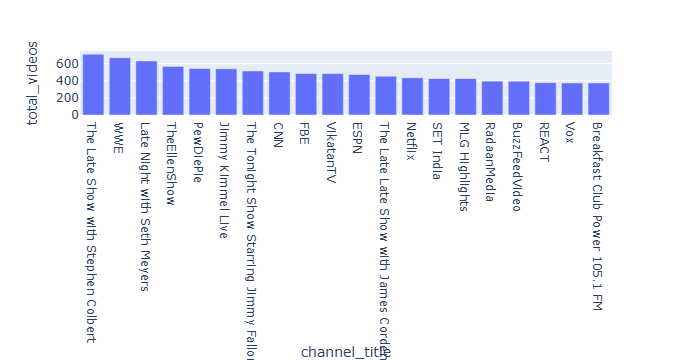

In [77]:
px.bar(data_frame=cdf[0:20],x='channel_title',y='total_videos')

### Does puchuations in title and tags have any relation with views, likes, dislikes and commens??

In [78]:
full_df1['title'][0]

'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [79]:
import string

In [83]:
string.punctuation # To print all types of Punctuation 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [86]:
[char for char in full_df1['title'][0] if char in string.punctuation]

['-', '(', ')', '.']

In [87]:
len([char for char in full_df1['title'][0] if char in string.punctuation])

4

In [97]:
sample=full_df1[0:10000]

In [98]:
def punc_count(text):
    return len([char for char in full_df1['title'][0] if char in string.punctuation])

In [99]:
sample['count_punc']=sample['title'].apply(punc_count)

In [100]:
sample['count_punc']

0       4
1       4
2       4
3       4
4       4
       ..
9995    4
9996    4
9997    4
9998    4
9999    4
Name: count_punc, Length: 10000, dtype: int64

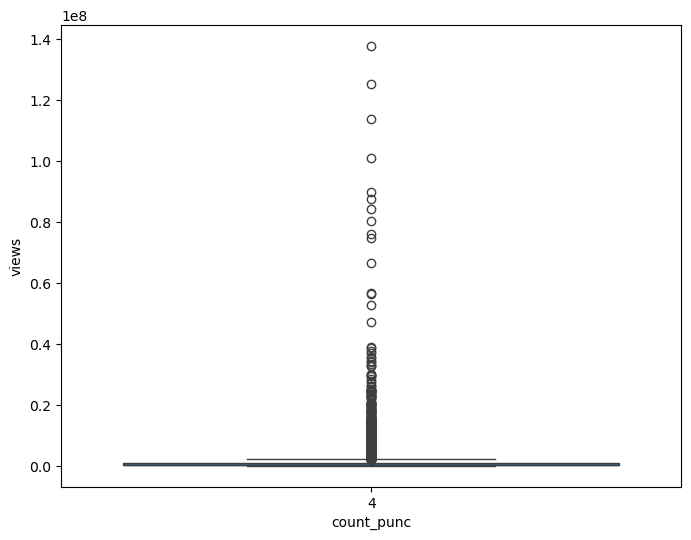

In [101]:
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc',y='views',data=sample)
plt.show()